In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('Delhi_Pollution_data+%282%29.xlsx')

In [3]:
df.shape

(2009, 16)

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101,Moderate
1,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114,Moderate
2,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233,Poor
3,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196,Moderate
4,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112,Moderate


In [5]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2004,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325,Very Poor
2005,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319,Very Poor
2006,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143,Moderate
2007,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454,Severe
2008,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472,Severe


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       2009 non-null   float64       
 3   PM10        2009 non-null   float64       
 4   NO          2009 non-null   float64       
 5   NO2         2009 non-null   float64       
 6   NOx         2009 non-null   float64       
 7   NH3         2009 non-null   float64       
 8   CO          2009 non-null   float64       
 9   SO2         2009 non-null   float64       
 10  O3          2009 non-null   float64       
 11  Benzene     2009 non-null   float64       
 12  Toluene     2009 non-null   float64       
 13  Xylene      2009 non-null   float64       
 14  AQI         2009 non-null   int64         
 15  AQI_Bucket  2009 non-null   object        
dtypes: datetime64[ns](1), fl

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,2009.0,117.173678,82.874704,10.24,57.10,94.62,152.99,685.36
PM10,2009.0,232.192952,119.553356,18.59,138.81,216.73,307.38,796.88
NO,2009.0,38.973863,33.374894,3.57,15.90,27.20,50.72,221.03
NO2,2009.0,50.781563,22.685704,10.63,33.90,47.15,63.57,162.50
NOx,2009.0,58.567023,37.690350,0.00,31.15,52.75,75.36,254.80
NH3,2009.0,41.979423,17.264428,6.78,31.22,38.04,48.68,166.70
CO,2009.0,1.976053,2.560253,0.00,0.91,1.24,1.87,30.44
SO2,2009.0,15.821792,7.752520,2.34,10.46,14.45,19.36,71.56
O3,2009.0,51.035794,25.548586,6.94,34.08,44.44,59.88,257.73
Benzene,2009.0,3.544480,2.431232,0.00,1.87,2.96,4.68,20.64


In [8]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# AQI and AQI_Bucket are the dependent features
# So, lets drop those columns which are not suitable for PCA (Principal Component Analysis)
df_pca = df.drop(['City','Date','AQI','AQI_Bucket'],axis=1)

In [11]:
df_pca.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65
1,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49
2,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13
3,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74
4,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43
5,50.01,112.08,9.67,22.06,21.75,32.64,1.01,11.66,24.82,2.07,23.31,0.70
6,38.37,77.76,9.33,21.41,21.17,30.48,1.02,11.28,25.92,1.59,19.18,0.49
7,30.91,62.61,6.63,16.84,15.72,31.45,0.89,11.02,24.77,1.28,12.13,0.27
8,29.02,64.12,6.22,16.39,15.33,33.32,0.88,11.09,28.64,1.25,12.99,0.33
9,39.47,77.48,5.67,20.61,17.46,34.32,0.91,11.08,42.76,1.54,18.47,0.37


In [12]:
#Check the numnber of features
print('The number of feature are :',len(df_pca.columns))

The number of feature are : 12


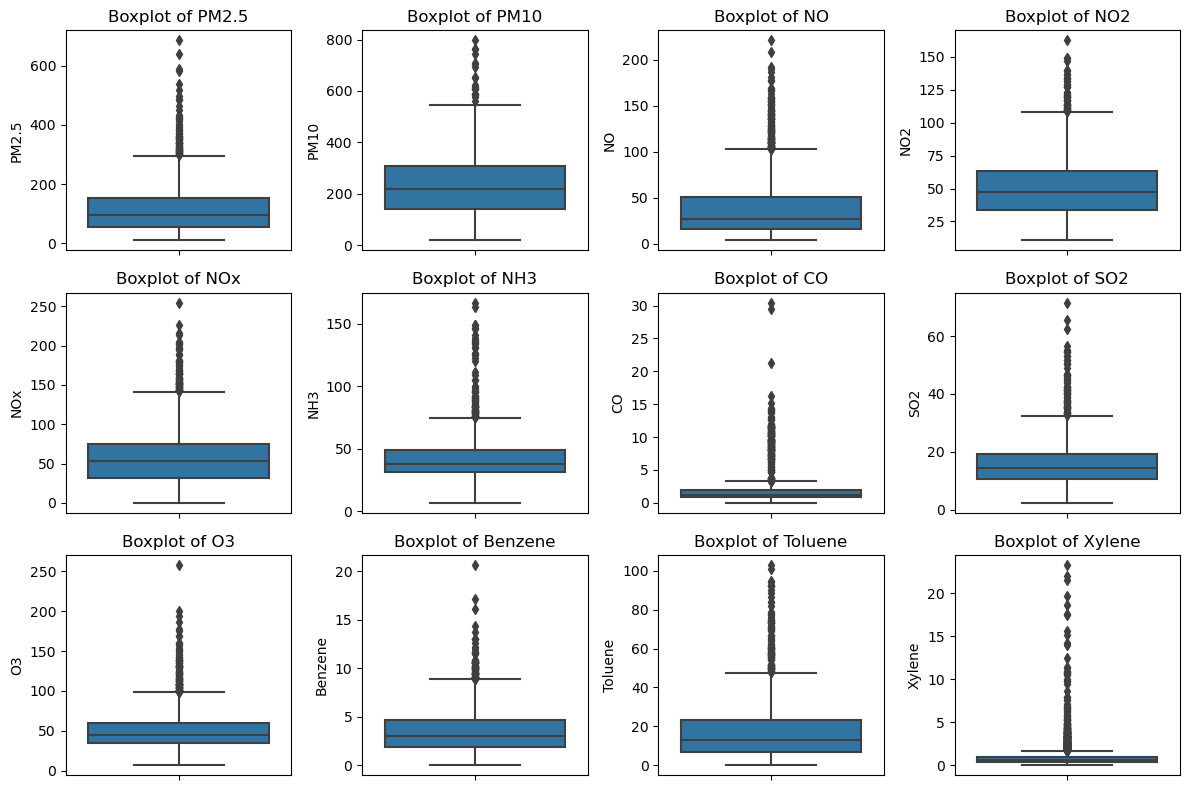

In [13]:
# Check is ther any outliers are present in each features or not
plt.figure(figsize=(12,8))
feature_list=df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df_pca[feature_list[i]],data=df_pca)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

As there are so many outliers present so we have to treat those outliers

In [14]:
# Define a function which returns upper and lower limit to detect outlier
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [15]:
# cap and floor the values beyond the outlier boundries
for i in feature_list:
    LL,UL = remove_outlier(df_pca[i])
    df_pca[i]=np.where (df_pca[i]>UL,UL,df_pca[i])
    df_pca[i]=np.where (df_pca[i]<LL,LL,df_pca[i])

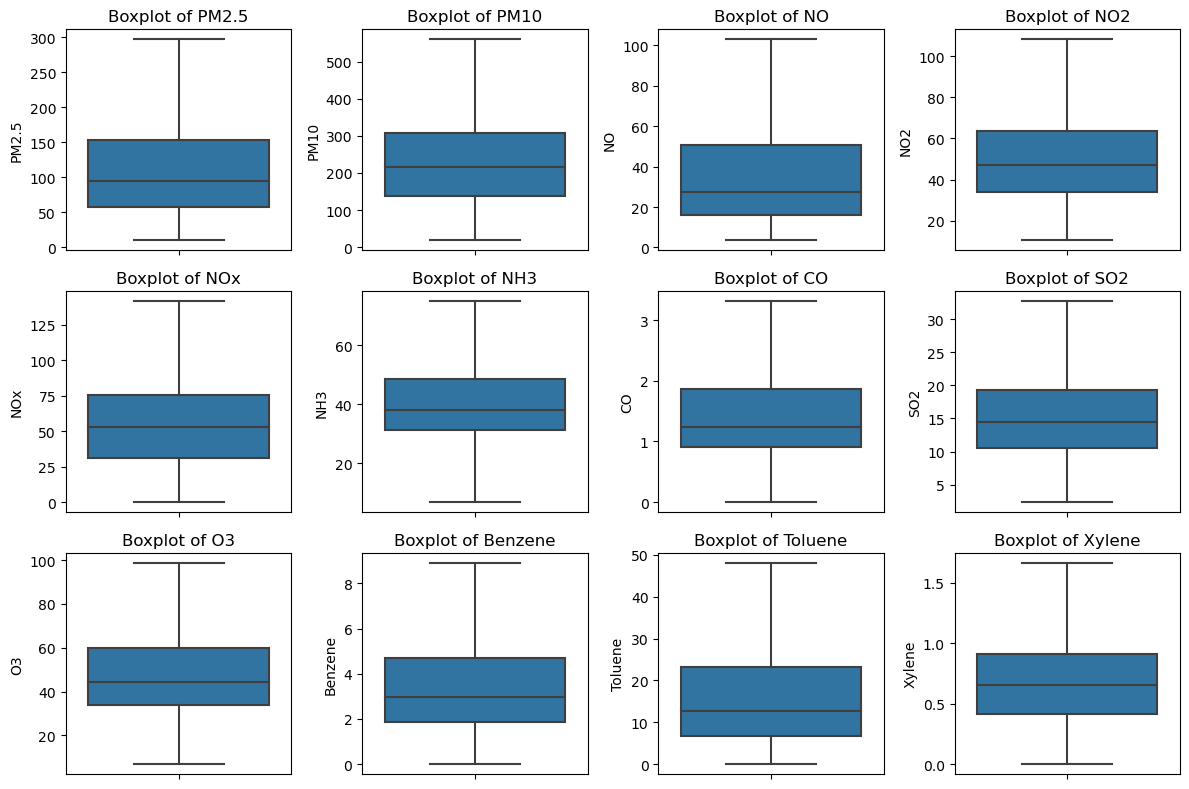

In [16]:
#check and verify whether outliers treated or not
plt.figure(figsize=(12,8))
feature_list=df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3,4,i+1)
    sns.boxplot(y = df_pca[feature_list[i]],data=df_pca)
    plt.title('Boxplot of {}' .format(feature_list[i]))
    plt.tight_layout()

In [17]:
# Now check the descriptive stats of above features
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,2009.0,114.304358,73.207550,10.24,57.10,94.62,152.99,296.825
PM10,2009.0,231.283146,116.454530,18.59,138.81,216.73,307.38,560.235
NO,2009.0,37.080572,27.868734,3.57,15.90,27.20,50.72,102.950
NO2,2009.0,50.418793,21.533088,10.63,33.90,47.15,63.57,108.075
NOx,2009.0,57.594064,34.831204,0.00,31.15,52.75,75.36,141.675
NH3,2009.0,41.004778,13.629083,6.78,31.22,38.04,48.68,74.870
CO,2009.0,1.457427,0.856552,0.00,0.91,1.24,1.87,3.310
SO2,2009.0,15.465983,6.480297,2.34,10.46,14.45,19.36,32.710
O3,2009.0,49.570667,20.892250,6.94,34.08,44.44,59.88,98.580
Benzene,2009.0,3.480214,2.228740,0.00,1.87,2.96,4.68,8.895


In [18]:
# Scale the data
from scipy.stats import zscore


In [19]:
df_pca_scaled=df_pca.apply(zscore)

In [20]:
#Check the data after scaling
df_pca_scaled.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-0.823814,-0.881449,-1.103682,-1.364231,-1.171197,-0.876637,-0.569198,-0.666182,-0.949903,-0.650850,0.571394,-0.164550
1,-1.017968,-1.196500,-1.115885,-1.507767,-1.210540,-0.919203,-0.721007,-0.764968,-0.587956,-0.857296,0.000887,-0.470643
2,-0.948832,-0.405093,-0.954015,-1.340076,-1.023879,-0.956633,-0.674297,-0.599811,-1.099278,-0.605970,0.589619,0.753730
3,-0.748529,0.664518,-0.876131,-1.338682,-0.968742,-0.861224,-0.604231,-0.735641,-1.509101,-0.794465,0.695004,1.767664
4,-1.017968,-0.647136,-0.940376,-1.345186,-1.008659,-0.702700,-0.685974,-0.785033,-1.469363,-0.803441,0.287725,-0.585428
5,-0.878466,-1.023857,-0.983805,-1.317315,-1.029335,-0.613898,-0.522488,-0.587462,-1.184977,-0.632898,0.550793,-0.068896
6,-1.037506,-1.318638,-0.996008,-1.347508,-1.045991,-0.772422,-0.510810,-0.646116,-1.132312,-0.848320,0.223543,-0.470643
7,-1.139433,-1.448764,-1.092915,-1.559793,-1.202499,-0.701233,-0.662619,-0.686248,-1.187370,-0.987447,-0.335079,-0.891522
8,-1.165257,-1.435794,-1.107630,-1.580696,-1.213699,-0.563992,-0.674297,-0.675443,-1.002088,-1.000911,-0.266935,-0.776737
9,-1.022476,-1.321043,-1.127371,-1.384670,-1.152531,-0.490601,-0.639264,-0.676987,-0.326071,-0.870760,0.167285,-0.700213


<Axes: >

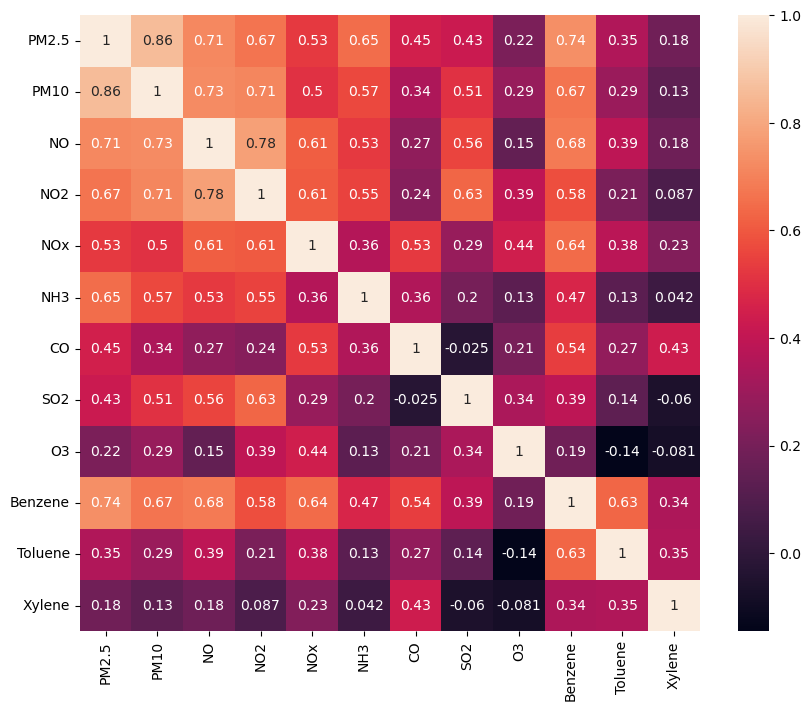

In [21]:
#Check for presence of correlation
plt.figure(figsize=(10,8))
sns.heatmap(df_pca_scaled.corr(),annot=True)


In [22]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Confirm the statistical significance of correlations
# H0 : Correlations are not significant , Ha : There are significant correlation
# If p-value is < 0.05 then reject the null hypothesis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

As the p-value is less than 0.05 then we ll reject the null hypothesis and we can say there are significant correlation.

In [24]:
# confirm the adequecy of sample size 
# Note : Above 0.7 is good and below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.8377873137578513

Now apply PCA taking all the features

In [25]:
from sklearn.decomposition import PCA


In [26]:
# Apply PCA taking all the features
pca=PCA(n_components=12,random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [27]:
# Extract eigen vectors
pca.components_

array([[ 0.36757983,  0.35874864,  0.3586897 ,  0.34856375,  0.31661476,
         0.27264851,  0.22407402,  0.2354441 ,  0.14900296,  0.35967138,
         0.20036925,  0.11870582],
       [ 0.01788055,  0.12180783,  0.07920562,  0.25502423, -0.07185109,
         0.06976372, -0.37463646,  0.38778796,  0.33653904, -0.20718676,
        -0.41848144, -0.53052722],
       [-0.10244197, -0.1082965 , -0.23877719, -0.02680145,  0.329494  ,
        -0.04259609,  0.46126311, -0.1934286 ,  0.65938621, -0.06805854,
        -0.32861601,  0.10988637],
       [ 0.2517615 ,  0.14172243, -0.04998115, -0.05800976, -0.19614686,
         0.64557842,  0.21025355, -0.42214395, -0.25004424, -0.10221822,
        -0.35987447, -0.17472887],
       [-0.02951417, -0.10587218, -0.06664532, -0.15232101,  0.3156141 ,
         0.03492092,  0.00652305, -0.27840717,  0.07088788,  0.1881715 ,
         0.44708658, -0.73591565],
       [-0.33778676, -0.35252369,  0.38787525,  0.34686121,  0.49700404,
         0.18451077, -

In [28]:
# Check the eigen values
# This return always in descending order
pca.explained_variance_

array([5.71418983, 1.73516949, 1.14758734, 0.95455182, 0.63944041,
       0.46998204, 0.36503474, 0.34686872, 0.1906889 , 0.16883957,
       0.15442402, 0.11919921])

In [29]:
# Check the explained variance of each PC
pca.explained_variance_ratio_

array([0.47594546, 0.14452548, 0.09558468, 0.07950639, 0.05326018,
       0.03914568, 0.03040442, 0.02889134, 0.01588283, 0.01406296,
       0.01286226, 0.00992832])

In [30]:
# Create a Data Frame containing the loading or coefficient of all PCs
df_extracted_loading=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'],index=df_pca_scaled.columns)

In [31]:
df_extracted_loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
PM2.5,0.367580,0.017881,-0.102442,0.251761,-0.029514,-0.337787,0.065633,0.275665,0.086309,-0.123236,-0.164356,0.738761
PM10,0.358749,0.121808,-0.108297,0.141722,-0.105872,-0.352524,0.123756,0.469464,-0.192561,-0.218866,0.015977,-0.606809
NO,0.358690,0.079206,-0.238777,-0.049981,-0.066645,0.387875,-0.144580,0.198196,0.126583,0.155804,0.736009,0.092056
NO2,0.348564,0.255024,-0.026801,-0.058010,-0.152321,0.346861,0.022629,-0.052348,-0.576914,0.421731,-0.385366,0.058499
NOx,0.316615,-0.071851,0.329494,-0.196147,0.315614,0.497004,-0.093880,0.218380,0.227118,-0.446437,-0.302527,-0.044863
NH3,0.272649,0.069764,-0.042596,0.645578,0.034921,0.184511,0.277003,-0.566976,0.115428,-0.193869,0.039794,-0.127519
CO,0.224074,-0.374636,0.461263,0.210254,0.006523,-0.203209,-0.607033,-0.152714,-0.298226,0.032584,0.170692,-0.013601
SO2,0.235444,0.387788,-0.193429,-0.422144,-0.278407,-0.223017,-0.365280,-0.437689,0.135554,-0.322230,-0.063257,-0.010476
O3,0.149003,0.336539,0.659386,-0.250044,0.070888,-0.218104,0.448666,-0.101397,-0.002582,0.103173,0.293715,0.078303
Benzene,0.359671,-0.207187,-0.068059,-0.102218,0.188172,-0.207380,-0.020012,-0.090417,0.531238,0.589204,-0.224580,-0.214074


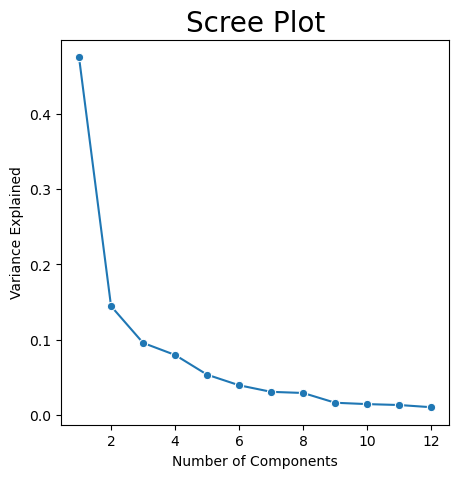

In [32]:
# create a scree plot
plt.figure(figsize=(5,5))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,13),marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot',fontsize=20)
plt.show()

In [33]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.47594546, 0.62047094, 0.71605562, 0.79556201, 0.84882219,
       0.88796786, 0.91837228, 0.94726362, 0.96314645, 0.97720941,
       0.99007168, 1.        ])

In [34]:
# Choose the PC basis cumulative explained variance
df_selected = df_extracted_loading [['PC1','PC2','PC3','PC4','PC5']]

In [35]:
df_selected

,PC1,PC2,PC3,PC4,PC5
PM2.5,0.367580,0.017881,-0.102442,0.251761,-0.029514
PM10,0.358749,0.121808,-0.108297,0.141722,-0.105872
NO,0.358690,0.079206,-0.238777,-0.049981,-0.066645
NO2,0.348564,0.255024,-0.026801,-0.058010,-0.152321
NOx,0.316615,-0.071851,0.329494,-0.196147,0.315614
NH3,0.272649,0.069764,-0.042596,0.645578,0.034921
CO,0.224074,-0.374636,0.461263,0.210254,0.006523
SO2,0.235444,0.387788,-0.193429,-0.422144,-0.278407
O3,0.149003,0.336539,0.659386,-0.250044,0.070888
Benzene,0.359671,-0.207187,-0.068059,-0.102218,0.188172


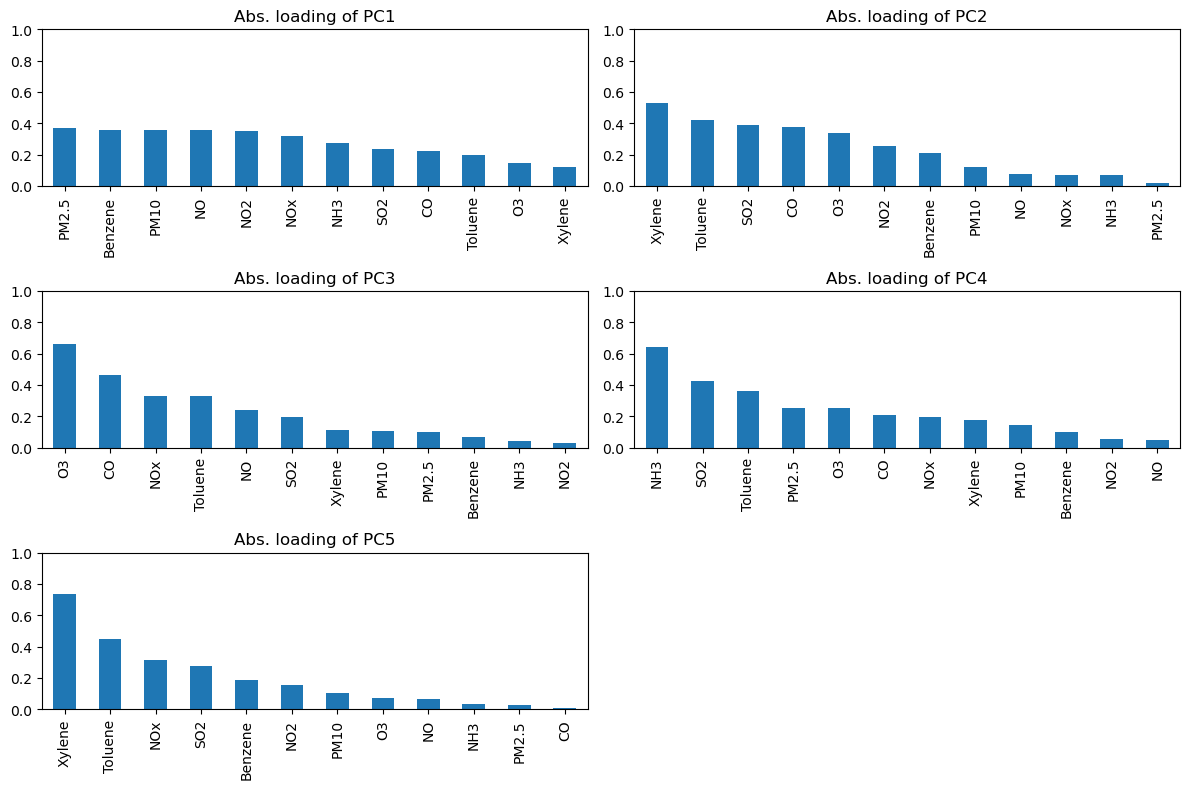

In [36]:
#check how original features matter to each PC 
# NOTE : Here we are only considering the absolute values
plt.figure(figsize=(12,8))
for i in range (len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending=False).plot.bar()
    plt.yticks(np.arange(0,1.2,0.2))
    plt.title('Abs. loading of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

<Axes: >

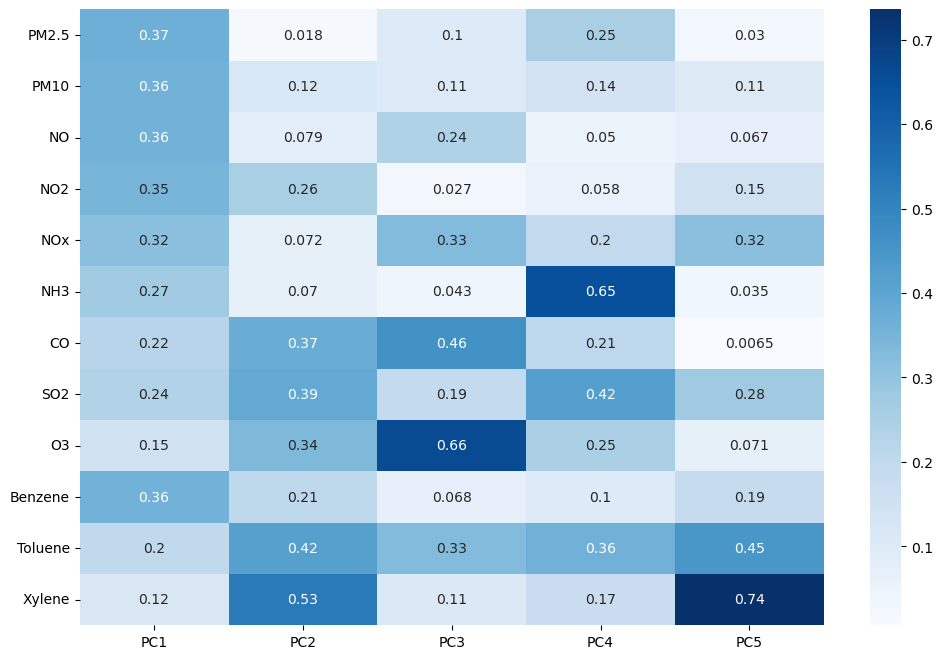

In [37]:
# Compare how the original PC influence various PCs
plt.figure(figsize=(12,8))
sns.heatmap(abs(df_selected),annot=True,cmap="Blues")

In [38]:
#In order to calculate below we need to loading, below
df_selected

,PC1,PC2,PC3,PC4,PC5
PM2.5,0.367580,0.017881,-0.102442,0.251761,-0.029514
PM10,0.358749,0.121808,-0.108297,0.141722,-0.105872
NO,0.358690,0.079206,-0.238777,-0.049981,-0.066645
NO2,0.348564,0.255024,-0.026801,-0.058010,-0.152321
NOx,0.316615,-0.071851,0.329494,-0.196147,0.315614
NH3,0.272649,0.069764,-0.042596,0.645578,0.034921
CO,0.224074,-0.374636,0.461263,0.210254,0.006523
SO2,0.235444,0.387788,-0.193429,-0.422144,-0.278407
O3,0.149003,0.336539,0.659386,-0.250044,0.070888
Benzene,0.359671,-0.207187,-0.068059,-0.102218,0.188172


In [39]:
# and we need original scaled feature
df_pca_scaled.iloc[0]

PM2.5     -0.823814
PM10      -0.881449
NO        -1.103682
NO2       -1.364231
NOx       -1.171197
NH3       -0.876637
CO        -0.569198
SO2       -0.666182
O3        -0.949903
Benzene   -0.650850
Toluene    0.571394
Xylene    -0.164550
Name: 0, dtype: float64

In [40]:
#we need to perform dot product between loading and features to obtain the scores
for i in df_selected.columns:
    pc_score=np.dot(df_selected[i],df_pca_scaled.iloc[0])
    print(round(pc_score,6),end=' ')
    

-2.665334 -0.91618 -0.790212 -0.245518 0.367239 

In [41]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca=PCA(n_components=5,random_state=123)
pca_final=pca.fit_transform(df_pca_scaled)

In [42]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df=pd.DataFrame(pca_final,columns=df_selected.columns)

In [43]:
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-2.665334,-0.916180,-0.790212,-0.245518,0.367239
1,-3.156439,-0.411456,-0.384953,-0.150697,0.398613
2,-2.354841,-1.347799,-0.881378,-0.483265,-0.338393
3,-1.829266,-1.964523,-1.144289,-0.255720,-1.167517
4,-2.781773,-0.676409,-1.105102,0.156680,0.541447
5,-2.552951,-1.016836,-0.896148,-0.122146,0.308240
6,-2.974647,-0.688794,-0.713432,-0.076641,0.467709
7,-3.461293,-0.243401,-0.666444,0.260655,0.516457
8,-3.394853,-0.254105,-0.564833,0.252188,0.474779
9,-2.949465,-0.223915,-0.256325,-0.014562,0.662630


<Axes: >

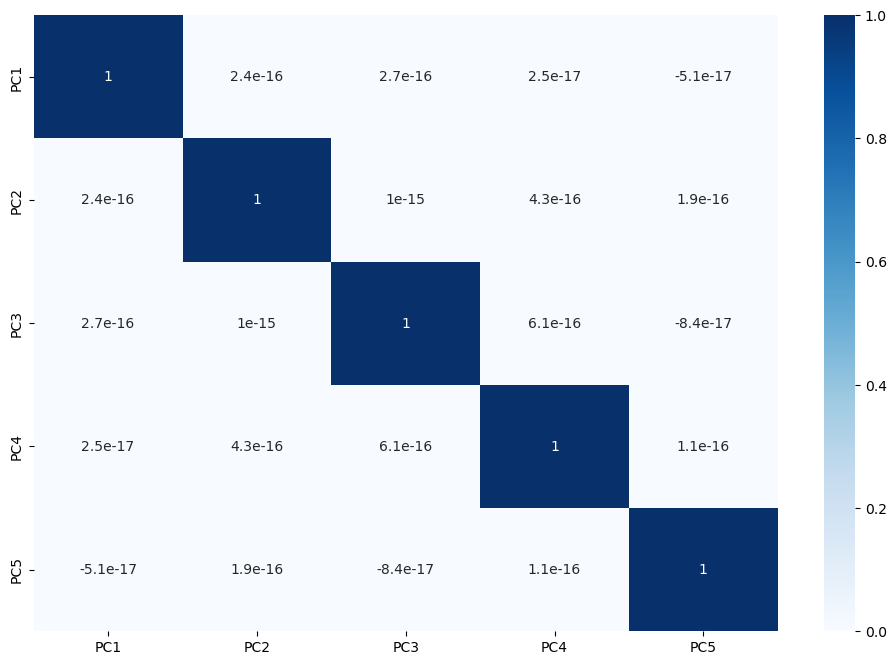

In [44]:
#Check for presence of correlations among teh PCs
plt.figure(figsize=(12,8))
sns.heatmap(pca_final_df.corr(),annot=True,cmap='Blues')